X:	Y:	   TS1:	   TS2: 	TOT:FPGA_TS:  TR_CNT:  BinCounter :  
HIT 3	317	1013	63	1	0	 0 25786 2026
HIT 3	318	1012	6	8	0	 0 25906 2024
HIT 3	319	1013	63	1	0	 0 26026 2026
HIT 23	338	408	51	0	0	 0 27146 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = open("fe_daq_data_1.txt", "r")
#data_all = data.read()
data_lines = data.readlines()
#print(data_all[66498000:66498560])

In [3]:
#data = open("data_test_2.txt", "r")
#data_all = data.read()
#print(data_all[0:200])

In [13]:
daq_dataframe = {}
X, Y, TS1, TS2, TOT = [], [], [], [], []
unique_params = ['X', 'Y', 'TS1', 'TS2', 'TOT']

for line in data_lines:
    entry = line.strip().split()
    if 'HIT' in line and len(entry)>8:
        X.append(float(entry[1]))
        Y.append(float(entry[2]))
        TS1.append(float(entry[3]))
        TS2.append(float(entry[4]))
        TOT.append(float(entry[5]))

In [14]:
data.close()

In [15]:
for k in range(len(X)):
    daq_dataframe[k] = {'X':X[k], 'Y':Y[k], 'TS1':TS1[k], 'TS2':TS2[k], 'TOT':TOT[k]}

In [ ]:
print(TS1[0:10])

In [16]:
daq_table = pd.DataFrame(daq_dataframe)
daq_data = daq_table.T

In [ ]:
daq_data

In [17]:
x_val, y_val, ts1, tot = np.zeros(len(daq_data)), np.zeros(len(daq_data)), np.zeros(len(daq_data)), np.zeros(len(daq_data))

for i in range(len(daq_data)):
    x_val[i] = float(daq_data['X'][i:i+1][i])
    y_val[i] = float(daq_data['Y'][i:i+1][i])
    ts1[i] = float(daq_data['TS1'][i:i+1][i])
    tot[i] = float(daq_data['TOT'][i:i+1][i])

In [ ]:
np.max(tot)

In [ ]:
plt.figure(figsize = (10, 8))
plt.title("Cd Source")
plt.xlabel("TOT")
plt.ylabel("Counts")
plt.hist(tot, bins=63)

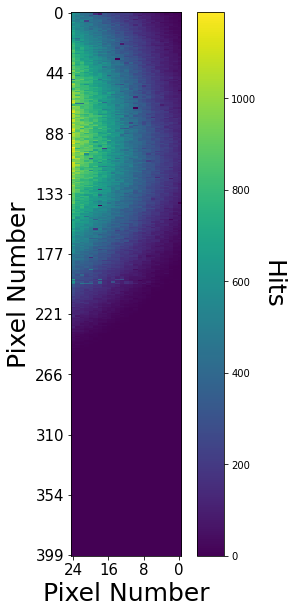

In [18]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 10))
plt.gca().set_aspect('equal', adjustable='box')
ax = plt.gca()

x_num = 25
y_num = 400
x_dim = 130*(10**-4)
y_dim = 40*(10**-4)
half_width = x_num*x_dim/2
half_height = y_num*y_dim/2

x_pos, y_pos = np.zeros(len(x_val)), np.zeros(len(y_val))

for i in range(len(x_val)):
    x_pos[i] = -(x_val[i]*x_dim) + half_width - (x_dim/2)
    y_pos[i] = -(y_val[i]*y_dim) + half_height - (y_dim/2)

x_edges = np.linspace(-half_width, half_width, x_num+1)
y_edges = np.linspace(-half_height, half_height, y_num+1)

limits = [-half_width, half_width, -half_height, half_height]
H, xedges, yedges = np.histogram2d(x_pos, y_pos, bins=[x_edges, y_edges])
H = H.T
im = plt.imshow(H, interpolation='nearest', origin='low', extent=[limits[0], limits[1], limits[2], limits[3]])
cbar = ax.figure.colorbar(im, ax=ax, pad=0.02)
cbar.ax.set_ylabel('Hits', rotation=-90, fontsize=25, va="bottom")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(np.linspace(0,24,4)*-x_dim + half_width - (x_dim/2))
ax.set_yticks(np.linspace(0,399,10)*-y_dim + half_height - (y_dim/2))
ax.set_xticklabels(np.linspace(0,24,4,dtype=int))
ax.set_yticklabels(np.linspace(0,399,10,dtype=int))

plt.ylabel('Pixel Number', fontsize=25)
plt.xlabel('Pixel Number', fontsize=25)
#plt.title('DAQ Data Threshold 0.9 V')

index = []

In [ ]:
x_num = 25
y_num = 400
x_dim = 130*(10**-4)
y_dim = 40*(10**-4)
half_width = x_num*x_dim/2
half_height = y_num*y_dim/2

x_pos, y_pos = np.zeros(len(x_val)), np.zeros(len(y_val))

for i in range(len(x_val)):
    x_pos[i] = -(x_val[i]*x_dim) + half_width - (x_dim/2)
    y_pos[i] = -(y_val[i]*y_dim) + half_height - (y_dim/2)

In [ ]:
lower_lim_x = 0
upper_lim_x = 0
lower_lim_y = 50
upper_lim_y = 50
 
ind_hits = 0
ind_hits = np.array(np.where((x_val >= lower_lim_x) & (x_val <= upper_lim_x) & (y_val >= lower_lim_y) & (y_val <= upper_lim_y)))

In [ ]:
print(ind_hits[0])

In [ ]:
for i in ind_hits[0]:
    print(x_val[i])

In [ ]:
tot_matrix = []

for value in ind_hits[0]:
        
        tot_matrix.append(tot[value])

In [ ]:
print(len(ind_hits[0]))

In [ ]:
print(tot[0:1000])

In [ ]:
plt.hist(tot_matrix, bins=2)

In [ ]:
f = open("mo_daq_VFBNPix_30_tot.txt","a")

In [ ]:
for m in tot:
    f.write(str(m)+', ')

In [ ]:
f.close()

In [ ]:
f = open("fe_0_50_tot.txt","r")

In [ ]:
test_read = f.read()

In [ ]:
print(test_read)

In [ ]:
f.close()

In [10]:
file = "ge_daq_VFBNPix_30_tot.txt"

open_daq = open(file, "r")
read_daq = open_daq.read().split(',')
read_daq.remove(' ')

In [11]:
ge_tot = np.array(read_daq, dtype=float)
open_daq.close()

In [ ]:
np.max(fe_norm_threshold)

In [ ]:
plt.hist(tot, bins=63)

In [ ]:
bins_2

In [ ]:
bins = np.linspace(0,64,65)
fit_hist_fe, bins_1_fe = np.histogram(fe_tot, bins=bins)
bins_2 = np.array([bins[i] for i in range(len(bins)-1)])

fit_hist_cd, bins_1_cd = np.histogram(cd_tot, bins=bins)

In [ ]:
print(len(bins_2[2:64]))

In [ ]:
print(len(fit_hist_cd[2:64]))

In [12]:
import scipy
from scipy.optimize import curve_fit
import pylab 
from matplotlib.pyplot import cm

plt.figure(figsize = (10, 8))

#bins_tot = np.linspace(0,int(np.max(fe_low_threshold_tot)),int(np.max(fe_low_threshold_tot)))
#fit_fe_low_tot, bins_1_sim = np.histogram(fe_low_threshold_tot, bins=bins_tot)
#bins_2_tot = np.array([bins_tot[i] for i in range(len(bins_tot)-1)])

#fit_fe_norm_tot, bins_1_sim = np.histogram(fe_norm_threshold, bins=bins_tot)

#plt.bar(bins_2_tot, fit_fe_low_tot, width=bins_tot[1] - bins_tot[0], color='orange', alpha=0.5, label='Low Threshold')
#plt.bar(bins_2_tot, fit_fe_norm_tot, width=bins_tot[1] - bins_tot[0], color='blue', alpha=0.5, label='Normal Threshold')

bins = np.linspace(0,64,65)
fit_hist_fe, bins_1_fe = np.histogram(fe_tot, bins=bins)
bins_2 = np.array([bins[i] for i in range(len(bins)-1)])

fit_hist_cd, bins_1_cd = np.histogram(cd_tot, bins=bins)
fit_hist_ba, bins_1_ba = np.histogram(ba_tot, bins=bins)

def Gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

xspace_fe = np.linspace(0, 20, 10000) # This creates a smoother plot when plotting the fit
xspace_cd = np.linspace(0, 20, 10000)

# Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable.
p01_fe = [900000,2.5,0.15]
p01_cd = [300000,5,1]
p01_ba = [300000,6,1]

popt_fe, pcov_fe = curve_fit(Gauss, xdata=bins_2+0.5, ydata=fit_hist_fe, p0=p01_fe)
popt_cd, pcov_cd = curve_fit(Gauss, xdata=bins_2[2:64]+0.5, ydata=fit_hist_cd[2:64], p0=p01_cd)
popt_ba, pcov_ba = curve_fit(Gauss, xdata=bins_2[2:64]+0.5, ydata=fit_hist_ba[2:64], p0=p01_ba)
        
# Print the outputs 
(Amp_fe, Mu_fe, Sigma_fe) = popt_fe
(Amp_cd, Mu_cd, Sigma_cd) = popt_cd
(Amp_ba, Mu_ba, Sigma_ba) = popt_ba

print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('Fe TOT', Amp_fe, Mu_fe, Sigma_fe))
print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('Cd TOT', Amp_cd, Mu_cd, Sigma_cd))
print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('Ba TOT', Amp_ba, Mu_ba, Sigma_ba))
energy_res_fe = (2.355*Sigma_fe*100)/Mu_fe # Calculates energy resolution
energy_res_cd = (2.355*Sigma_cd*100)/Mu_cd # Calculates energy resolution
energy_res_ba = (2.355*Sigma_ba*100)/Mu_ba # Calculates energy resolution
(Amp_err_fe, Mu_err_fe, Sigma_err_fe) = np.sqrt(np.diag(pcov_fe))
(Amp_err_cd, Mu_err_cd, Sigma_err_cd) = np.sqrt(np.diag(pcov_cd))
(Amp_err_ba, Mu_err_ba, Sigma_err_ba) = np.sqrt(np.diag(pcov_ba))
# Error propagation
partial_sigma_fe = (2.355*100)/Mu_fe
partial_mu_fe = (2.355*100*Sigma_fe)/(Mu_fe**2)
stdev_er_fe = np.sqrt(((partial_sigma_fe**2)*(Sigma_err_fe**2))+((partial_mu_fe**2)*(Mu_err_fe)**2))
#
partial_sigma_cd = (2.355*100)/Mu_cd
partial_mu_cd = (2.355*100*Sigma_cd)/(Mu_cd**2)
stdev_er_cd = np.sqrt(((partial_sigma_cd**2)*(Sigma_err_cd**2))+((partial_mu_cd**2)*(Mu_err_cd)**2))
#
partial_sigma_ba = (2.355*100)/Mu_ba
partial_mu_ba = (2.355*100*Sigma_ba)/(Mu_ba**2)
stdev_er_ba = np.sqrt(((partial_sigma_ba**2)*(Sigma_err_ba**2))+((partial_mu_ba**2)*(Mu_err_ba)**2))
#
print("*****")
print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err_fe, Mu_err_fe, Sigma_err_fe))
print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Fe TOT', energy_res_fe, stdev_er_fe))
#
print("*****")
print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err_cd, Mu_err_cd, Sigma_err_cd))
print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Cd TOT', energy_res_cd, stdev_er_cd))
#
print("*****")
print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err_ba, Mu_err_ba, Sigma_err_ba))
print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Ba TOT', energy_res_ba, stdev_er_ba))
#
plt.bar(bins_2[0:20]+0.5, fit_hist_fe[0:20], width=bins_2[1] - bins_2[0], color='orange', alpha=0.4, label='Fe')
plt.bar(bins_2[0:20]+0.5, fit_hist_cd[0:20], width=bins_2[1] - bins_2[0], color='blue', alpha=0.4, label='Cd')
plt.bar(bins_2[0:20]+0.5, fit_hist_ba[0:20], width=bins_2[1] - bins_2[0], color='green', alpha=0.4, label='Ba')
# Plot the fit
plt.plot(xspace_fe, Gauss(xspace_fe, *popt_fe), '-', color='orangered')
plt.plot(xspace_cd, Gauss(xspace_cd, *popt_cd), '-', color='blue')
plt.plot(xspace_cd, Gauss(xspace_cd, *popt_ba), '-', color='darkslategray')
#
axes = plt. gca()
axes.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=25)
#plt.title("TOT Energy Resolution", fontsize='x-large')
plt.xlabel("TOT", fontsize=30)
plt.ylabel("Counts", fontsize=30)
#plt.savefig('bad_tot_res_plot.png')

NameError: name 'fe_tot' is not defined

<Figure size 720x576 with 0 Axes>

In [17]:
def plot_tot(daq_tot, labels, guesses):
    
    import scipy
    from scipy.optimize import curve_fit
    import pylab 
    from matplotlib.pyplot import cm

    plt.figure(figsize = (10, 8))
    colors=(cm.rainbow(np.linspace(0,1,len(labels)*4)))
    color_fit=(cm.nipy_spectral(np.linspace(0,1,len(labels)*4)))

    #bins_tot = np.linspace(0,int(np.max(fe_low_threshold_tot)),int(np.max(fe_low_threshold_tot)))
    #fit_fe_low_tot, bins_1_sim = np.histogram(fe_low_threshold_tot, bins=bins_tot)
    #bins_2_tot = np.array([bins_tot[i] for i in range(len(bins_tot)-1)])

    #fit_fe_norm_tot, bins_1_sim = np.histogram(fe_norm_threshold, bins=bins_tot)

    #plt.bar(bins_2_tot, fit_fe_low_tot, width=bins_tot[1] - bins_tot[0], color='orange', alpha=0.5, label='Low Threshold')
    #plt.bar(bins_2_tot, fit_fe_norm_tot, width=bins_tot[1] - bins_tot[0], color='blue', alpha=0.5, label='Normal Threshold')

    for i in range(len(daq_tot)):
        
        bins = np.linspace(0,64,65)
        fit_hist, bins_1 = np.histogram(daq_tot[i], bins=bins)
        bins_2 = np.array([bins[i] for i in range(len(bins)-1)])

        def Gauss(x, A, mu, sigma):
            return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

        xspace = np.linspace(0, 20, 10000) # This creates a smoother plot when plotting the fit

        # Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable

        popt, pcov = curve_fit(Gauss, xdata=bins_2[2:64]+0.5, ydata=fit_hist[2:64], p0=guesses[i])

        # Print the outputs 
        (Amp, Mu, Sigma) = popt

        print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %(labels[i]+' TOT', Amp, Mu, Sigma))
        energy_res = (2.355*Sigma*100)/Mu # Calculates energy resolution
        (Amp_err, Mu_err, Sigma_err) = np.sqrt(np.diag(pcov))
    
        # Error propagation
        partial_sigma = (2.355*100)/Mu
        partial_mu = (2.355*100*Sigma)/(Mu**2)
        stdev_er = np.sqrt(((partial_sigma**2)*(Sigma_err**2))+((partial_mu**2)*(Mu_err)**2))
   
        print("*****")
        print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err, Mu_err, Sigma_err))
        print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Fe TOT', energy_res, stdev_er))
  
        plt.bar(bins_2[0:20]+0.5, fit_hist[0:20], width=bins_2[1] - bins_2[0], color=colors[4*i], alpha=0.4, label=labels[i])
        # Plot the fit
        plt.plot(xspace, Gauss(xspace, *popt), '-', color=colors[4*i+1])
    
    plt.legend(fontsize=25)
    #plt.title("TOT Energy Resolution", fontsize='x-large')
    plt.xlabel("TOT", fontsize=30)
    plt.ylabel("Counts", fontsize=30)
    #plt.savefig('bad_tot_res_plot.png')
    axes = plt. gca()
    axes.tick_params(axis='both', which='major', labelsize=25)
    
    return 

For Ge TOT, amplitude = 404602, Mu = 4.1332, Sigma = 1.3152
*****
Error in amplitude is 2370.898. 
Error in mu is 0.009061. 
Error in sigma is 0.009884.
The energy resolution for Fe TOT is approximately 74.937 +/- 0.58662 %.
For Y TOT, amplitude = 280187, Mu = 4.7086, Sigma = 1.9454
*****
Error in amplitude is 1260.089. 
Error in mu is 0.010852. 
Error in sigma is 0.012152.
The energy resolution for Fe TOT is approximately 97.298 +/- 0.64784 %.
For Mo TOT, amplitude = 168573, Mu = 4.8374, Sigma = 2.2643
*****
Error in amplitude is 620.672. 
Error in mu is 0.010947. 
Error in sigma is 0.012312.
The energy resolution for Fe TOT is approximately 110.231 +/- 0.64920 %.
For Cd TOT, amplitude = 263419, Mu = 5.2827, Sigma = 2.5852
*****
Error in amplitude is 1961.414. 
Error in mu is 0.025095. 
Error in sigma is 0.028182.
The energy resolution for Fe TOT is approximately 115.250 +/- 1.37047 %.


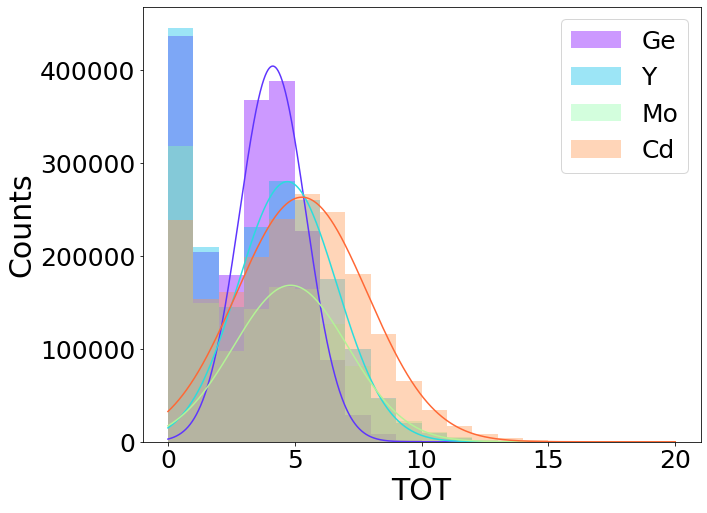

In [18]:
plot_tot([ge_tot, y_tot, mo_tot, cd_tot], ['Ge', 'Y', 'Mo', 'Cd'], [[300000,5,1], [300000,4,1], [300000,4,1], [300000,4,1]])

In [ ]:
import scipy
from scipy.optimize import curve_fit
import pylab 
from matplotlib.pyplot import cm

plt.figure(figsize = (10, 8))

#bins_tot = np.linspace(0,int(np.max(fe_low_threshold_tot)),int(np.max(fe_low_threshold_tot)))
#fit_fe_low_tot, bins_1_sim = np.histogram(fe_low_threshold_tot, bins=bins_tot)
#bins_2_tot = np.array([bins_tot[i] for i in range(len(bins_tot)-1)])

#fit_fe_norm_tot, bins_1_sim = np.histogram(fe_norm_threshold, bins=bins_tot)

#plt.bar(bins_2_tot, fit_fe_low_tot, width=bins_tot[1] - bins_tot[0], color='orange', alpha=0.5, label='Low Threshold')
#plt.bar(bins_2_tot, fit_fe_norm_tot, width=bins_tot[1] - bins_tot[0], color='blue', alpha=0.5, label='Normal Threshold')

bins = np.linspace(0,64,65)
fit_hist_cd_30, bins_1_cd_30 = np.histogram(cd_VFBNPix_30, bins=bins)
bins_2 = np.array([bins[i] for i in range(len(bins)-1)])

fit_hist_cd_20, bins_1_cd_20 = np.histogram(cd_VFBNPix_20, bins=bins)
fit_hist_cd_5, bins_1_cd_5 = np.histogram(cd_VFBNPix_20, bins=bins)

def Gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

#xspace_fe = np.linspace(0, 20, 10000) # This creates a smoother plot when plotting the fit
xspace_cd = np.linspace(0, 20, 10000)

# Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable.
p01_cd_30 = [900000,5,1]
p01_cd_20 = [300000,6,1]
p01_cd_5 = [300000,10,1]

popt_cd_30, pcov_cd_30 = curve_fit(Gauss, xdata=bins_2[2:64]+0.5, ydata=fit_hist_cd_30[2:64], p0=p01_cd_30)
popt_cd_20, pcov_cd_20 = curve_fit(Gauss, xdata=bins_2[2:64]+0.5, ydata=fit_hist_cd_20[2:64], p0=p01_cd_20)
popt_cd_5, pcov_cd_5 = curve_fit(Gauss, xdata=bins_2[2:64]+0.5, ydata=fit_hist_cd_5[2:64], p0=p01_cd_5)
        
# Print the outputs 
(Amp_cd_30, Mu_cd_30, Sigma_cd_30) = popt_cd_30
(Amp_cd_20, Mu_cd_20, Sigma_cd_20) = popt_cd_20
(Amp_cd_5, Mu_cd_5, Sigma_cd_5) = popt_cd_5

print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('Cd TOT w VFBNPix 30', Amp_cd_30, Mu_cd_30, Sigma_cd_30))
print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('Cd TOT x VFBNPix 20', Amp_cd_20, Mu_cd_20, Sigma_cd_20))
print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('Cd TOT w VFBNPix 5', Amp_cd_5, Mu_cd_5, Sigma_cd_5))
energy_res_cd_30 = (2.355*Sigma_cd_30*100)/Mu_cd_30 # Calculates energy resolution
energy_res_cd_20 = (2.355*Sigma_cd_20*100)/Mu_cd_20 # Calculates energy resolution
energy_res_cd_5 = (2.355*Sigma_cd_5*100)/Mu_cd_5 # Calculates energy resolution
(Amp_err_cd_30, Mu_err_cd_30, Sigma_err_cd_30) = np.sqrt(np.diag(pcov_cd_30))
(Amp_err_cd_20, Mu_err_cd_20, Sigma_err_cd_20) = np.sqrt(np.diag(pcov_cd_20))
(Amp_err_cd_5, Mu_err_cd_5, Sigma_err_cd_5) = np.sqrt(np.diag(pcov_cd_5))
# Error propagation
partial_sigma_cd_30 = (2.355*100)/Mu_cd_30
partial_mu_cd_30 = (2.355*100*Sigma_cd_30)/(Mu_cd_30**2)
stdev_er_cd_30 = np.sqrt(((partial_sigma_cd_30**2)*(Sigma_err_cd_30**2))+((partial_mu_cd_30**2)*(Mu_err_cd_30)**2))
#
partial_sigma_cd_20 = (2.355*100)/Mu_cd_20
partial_mu_cd_20 = (2.355*100*Sigma_cd_20)/(Mu_cd_20**2)
stdev_er_cd_20 = np.sqrt(((partial_sigma_cd_20**2)*(Sigma_err_cd_20**2))+((partial_mu_cd_20**2)*(Mu_err_cd_20)**2))
#
partial_sigma_cd_5 = (2.355*100)/Mu_cd_5
partial_mu_cd_5 = (2.355*100*Sigma_cd_5)/(Mu_cd_5**2)
stdev_er_cd_5 = np.sqrt(((partial_sigma_cd_5**2)*(Sigma_err_cd_5**2))+((partial_mu_cd_5**2)*(Mu_err_cd_5)**2))
#
print("*****")
print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err_cd_30, Mu_err_cd_30, Sigma_err_cd_30))
print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Cd TOT VFBNPix 30', energy_res_cd_30, stdev_er_cd_30))
#
print("*****")
print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err_cd_20, Mu_err_cd_20, Sigma_err_cd_20))
print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Cd TOT VFBNPix 20', energy_res_cd_20, stdev_er_cd_20))
#
print("*****")
print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err_cd_5, Mu_err_cd_5, Sigma_err_cd_5))
print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %('Cd TOT VFBNPix 5', energy_res_cd_5, stdev_er_cd_5))
#
plt.bar(bins_2[0:20]+0.5, fit_hist_cd_30[0:20], width=bins_2[1] - bins_2[0], color='orange', alpha=0.4, label='Cd VFNBPix 30')
plt.bar(bins_2[0:20]+0.5, fit_hist_cd_20[0:20], width=bins_2[1] - bins_2[0], color='blue', alpha=0.4, label='Cd VFBNPix 20')
plt.bar(bins_2[0:20]+0.5, fit_hist_cd_5[0:20], width=bins_2[1] - bins_2[0], color='green', alpha=0.4, label='Cd VFBNPix 5')
# Plot the fit
plt.plot(xspace_cd, Gauss(xspace_cd, *popt_cd_30), '-', color='orangered')
plt.plot(xspace_cd, Gauss(xspace_cd, *popt_cd_20), '-', color='blue')
plt.plot(xspace_cd, Gauss(xspace_cd, *popt_cd_5), '-', color='darkslategray')
#
plt.legend(fontsize=25)
#plt.title("TOT Energy Resolution", fontsize='x-large')
plt.xlabel("TOT", fontsize='x-)
plt.ylabel("Counts", fontsize='x-large')
#plt.savefig('bad_tot_res_plot.png')

In [ ]:
print(fit_hist_cd[0:20])
print(bins_2[0:20])

In [ ]:
plt.figure(figsize = (10, 8))
plt.hist(daq_1_matrix_1, bins=5)
plt.title("Fe Source, Matrix 1")
plt.xlabel("TOT")
plt.ylabel("Counts")

In [ ]:
else:
    print("There are %d total triggers." %(len(index)))
    x_blank = np.zeros(len(x_hits))
    y_blank = np.zeros(len(y_hits))

    for i in range(len(x_hits)):
        x_blank[i] = x_hits[int(index[1])]
        y_blank[i] = y_hits[int(index[1])]
            
    plt.figure(figsize = (10,8))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    limits = [-half_width, half_width, -half_height, half_height]
    x_edges = np.linspace(-half_width, half_width, x_num+1)
    y_edges = np.linspace(-half_height, half_height, y_num+1)
        
    H, xedges, yedges = np.histogram2d(x_blank, y_blank, bins=[x_edges, y_edges])
    H = H.T
    im = plt.imshow(H, interpolation='nearest', origin='low', extent=[limits[0], limits[1], limits[2], limits[3]], cmap='YlOrRd')
    ax.set_xticks(np.linspace(0,24,5)*-x_dim + half_width - (x_dim/2))
    ax.set_yticks(np.linspace(0,399,20)*-y_dim + half_height - (y_dim/2))
    ax.set_xticklabels(np.linspace(0,24,5,dtype=int))
    ax.set_yticklabels(np.linspace(0,399,20,dtype=int))
    plt.xlim(-half_width, half_width)
    plt.ylim(-half_height, half_height)
    plt.xlabel('Pixel Number', size=12)
    plt.ylabel('Pixel Number', size=12)
    plt.title('Pixel %d, %d.' %(x_pixel, y_pixel))
    
    e_hits = np.zeros(len(index))
        
    for i in range(len(index)):
        e_hits[i] = e_dep[int(index[i])]
            
    def Gauss(x, A, mu, sigma):
            return A*np.exp(-(x-mu)**2/(2.0*sigma**2))
    
    bins_pixel = np.linspace(0.03,19.0,20)
    fit_hist_pixel, bins_1 = np.histogram(e_hits, bins=bins_pixel)
    bins_2_pixel = np.array([bins_pixel[i] for i in range(len(bins_pixel)-1)])

    #x = bins_2
    #y = fit_hist
    xspace = np.linspace(0.03, 19.0, 10000) # This creates a smoother plot when plotting the fit

    # Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable.
    p01_pixel = [5,15.0,0.5]

    popt_pixel, pcov_pixel = curve_fit(Gauss, xdata=bins_2_pixel, ydata=fit_hist_pixel, p0=p01_pixel)
        
    plt.figure(num=None, figsize=(10, 8))
    # Print the outputs 
    (Amp_pix, Mu_pix, Sigma_pix) = popt_pixel
    print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %('simulated Y', Amp_pix, Mu_pix, Sigma_pix))
    energy_res_pix = (2.355*Sigma_pix*100)/Mu # Calculates energy resolution
    (Amp_pix_err, Mu_pix_err, Sigma_pix_err) = np.sqrt(np.diag(pcov_pixel))
    # Error propagation
    partial_sigma = (2.355*100)/Mu_pix
    partial_mu = (2.355*100*Sigma_pix)/(Mu_pix**2)
    stdev_er = np.sqrt(((partial_sigma**2)*(Sigma_pix_err**2))+((partial_mu**2)*(Mu_pix_err)**2))
    print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_pix_err, Mu_pix_err, Sigma_pix_err))
    print("The energy resolution for %s is approximately %0.4f +/- %0.4f %%." %('Y', energy_res_pix, stdev_er))
    plt.bar(bins_2_pixel, fit_hist_pixel, width=bins_pixel[1] - bins_pixel[0], color='blue', alpha=0.7, label=r'Y Data')
    # Plot the fit
    plt.plot(xspace, Gauss(xspace, *popt_pixel), '-', color='orange')
    plt.legend()
    plt.title('Energy Spectrum for Pixel %d, %d' %(x_pixel, y_pixel))
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts')
    plt.show()

In [ ]:
position_cuts = np.logical_and(([(x-1) <= elem <= (x+1) for elem in x_test]), ([(y-1) <= elem <= (y+1) for elem in y_test]))

In [ ]:
np.array(np.where(np.logical_and(position_cuts, ([(ts-3) <= elem <= (ts+3) for elem in time_test]))))[0]

In [ ]:
np.array(np.where((x_test >= (x-1)) & (x_test <= (x+1)) & (y_test >= (y-1)) & (y_test <= (y+1)) & (time_test >= (ts-2)) & (time_test <= (ts+2))))

In [ ]:
#hit_dict = {}
x_test = x_val[0:1000]
y_test = y_val[0:1000]
time_test = ts1[0:1000]
v = []
not_v = []
cluster_no = 0
clusters = []
parent_pixel = []

for m in range(len(x_test)):
    
    if m not in v:
    
        print("At loop %d" %m)
        x = x_test[m]
        print(x)
        y = y_test[m]
        print(y)
        ts = time_test[m]
        #position_cuts = np.logical_and(([(x-1) <= elem <= (x+1) for elem in x_test]), ([(y-1) <= elem <= (y+1) for elem in y_test]))
        #ind_new = np.array(np.where(np.logical_and(position_cuts, ([(ts-3) <= elem <= (ts+3) for elem in time_test]))))[0]
        ind_new = np.array(np.where((x_test >= (x-1)) & (x_test <= (x+1)) & (y_test >= (y-1)) & (y_test <= (y+1)) & (time_test >= (ts-2)) & (time_test <= (ts+2))))[0]
        ind_new = ind_new[ind_new != m]
        for elem in ind_new:
            if elem in not_v:
                ind_new = np.delete(ind_new, np.where(ind_new==elem))
            if elem in v:
                ind_new = np.delete(ind_new, np.where(ind_new==elem))
        v = np.append(v, m)
        not_v = np.append(not_v, ind_new)

        if len(ind_new) > 0:
            cluster_no += 1
            next_cluster = []
            print("Found a cluster (cluster # %d), exploring the area..." %cluster_no)
            parent_pixel.append(m)
            v, next_cluster = dfs(v, next_cluster, not_v, x_test, y_test, time_test, m, m)
            print(next_cluster)
            clusters.append(next_cluster)
            #hit_dict[cluster_no] = {'Parent Pixel':m, 'Affected Pixels':v_cluster}

In [ ]:
def dfs(visited, single_cluster, not_checked, x_array, y_array, time_array, ind, time_ind):

    ind_new = []

    for i in not_checked: 
        
        if i in visited:
            print("Copy!")
            print("pixels to be checked are...")
            not_checked = np.delete(not_checked, np.where(not_checked==i))
            print(not_checked)
            print("pixels visited so far are...")
            print(visited)
            print("***********")

        else:
            print("Not a copy! Iterating again...")
            x = x_array[int(i)]
            y = y_array[int(i)]
            ts = time_array[int(time_ind)]
            print("Looking at %d, %d, %d" %(x, y, ts))
            #position_cuts = np.logical_and(([(x-1) <= elem <= (x+1) for elem in x_test]), ([(y-1) <= elem <= (y+1) for elem in y_test]))
            #ind_new = np.array(np.where(np.logical_and(position_cuts, ([(ts-3) <= elem <= (ts+3) for elem in time_test]))))[0]
            ind_new = np.array(np.where((x_test >= (x-1)) & (x_test <= (x+1)) & (y_test >= (y-1)) & (y_test <= (y+1)) & (time_test >= (ts-2)) & (time_test <= (ts+2))))[0]
            ind_new = ind_new[ind_new != i]
            print("i is %0.1f" %i)
            print("pixels visited so far are...")
            visited = np.append(visited, int(i))
            single_cluster = np.append(single_cluster, int(i))
            print(visited)
            print("Before combing, the new indices are:")
            print(ind_new)
            for elem in ind_new:
                if elem in not_checked:
                    ind_new = np.delete(ind_new, np.where(ind_new==elem))
                if elem in visited:
                    ind_new = np.delete(ind_new, np.where(ind_new==elem))
            print("After combing, the new indices are:")
            print(ind_new)
            if len(ind_new) > 0:
                not_checked = np.insert(not_checked, 0, ind_new)
            print("pixels to be checked are...")
            print(not_checked)
            print("***********")
            visited, single_cluster = dfs(visited, single_cluster, not_checked, x_array, y_array, time_array, i, time_ind)

    return visited, single_cluster

In [ ]:
[print(tot[int(p)]) for p in parent_pixel]

In [ ]:
print(tot[0:100])

In [ ]:
parent_coords = []
#parent_coords.append([x_val[p], y_val[p]]) for p in parent_pixel

In [ ]:
[parent_coords.append([x_val[p], y_val[p]]) for p in parent_pixel]

In [ ]:
parent_coords

In [ ]:
cluster_coords = []

for p in range(len(clusters)):
    some_hits = []
    [some_hits.append([x_val[int(q)], y_val[int(q)]]) for q in clusters[p]]
    cluster_coords.append(some_hits)

In [ ]:
cluster_energies = []

for p in range(len(parent_pixel)):
    some_energies = []
    some_energies.append(tot[int(parent_pixel[p])])
    [some_energies.append(tot[int(q)]) for q in clusters[p]]
    cluster_energies.append(some_energies)

In [ ]:
cluster_coords

In [ ]:
cluster_energies

In [ ]:
cluster_size = np.zeros(len(parent_pixel))

for p in range(len(parent_pixel)):
    cluster_size[p] = len(clusters[p]) + 1

In [ ]:
cluster_size

In [ ]:
hit_dict = {}

for l in range(len(parent_pixel)):
    hit_dict['%d'%(l+1)] = {'Parent Pixel':parent_coords[l], 'Cluster Hits':cluster_coords[l], 'Energies (TOT)': cluster_energies[l], 'Average Energy':np.average(cluster_energies[l]), 'Cluster Size': cluster_size[l]}

In [ ]:
print(np.average(cluster_size))

In [ ]:
print(np.average(cluster_energies))

In [ ]:
np.average(cluster_size)

In [ ]:
len(parent_pixel)

In [ ]:
energy_tot_cluster = []

for elem in cluster_energies:
    for val in elem:
        energy_tot_cluster.append(val)
        
plt.hist(energy_tot_cluster, bins=3)

In [ ]:
energy_tot_cluster

In [ ]:
import pandas as pd 
cluster_table = pd.DataFrame.from_dict(hit_dict)
cluster_table = cluster_table.T
pd.set_option('display.max_rows', 200) 
cluster_table

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8))
plt.plot(cluster_size,[np.average(cluster_energies[p]) for p in range(len(cluster_energies))], '.')
plt.xlabel('Cluster Size (# Pixels)', fontsize='large')
plt.ylabel('Average Energy of Cluster', fontsize='large')
plt.title('Cluster Size v. Avg Energy', fontsize='x-large')

In [ ]:
cluster_coords[]

In [ ]:
x_cluster = []

for s in range(len(parent_pixel)):
    x_cluster.append(parent_coords[s][0])
    [x_cluster.append(cluster_coords[s][t][0]) for t in range(len(cluster_coords[s]))]

In [ ]:
y_cluster = []

for s in range(len(parent_pixel)):
    y_cluster.append(parent_coords[s][1])
    [y_cluster.append(cluster_coords[s][t][1]) for t in range(len(cluster_coords[s]))]

In [ ]:
print(y_cluster)

In [ ]:
# Plot heatmap of clusters
x_num = 25
y_num = 400
x_dim = 130*(10**-4)
y_dim = 40*(10**-4)
half_width = x_num*x_dim/2
half_height = y_num*y_dim/2

x_cluster_pos, y_cluster_pos = np.zeros(len(x_cluster)), np.zeros(len(y_cluster))

for i in range(len(x_cluster)):
    x_cluster_pos[i] = -(x_cluster[i]*x_dim) + half_width - (x_dim/2)
    y_cluster_pos[i] = -(y_cluster[i]*y_dim) + half_height - (y_dim/2)

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 14))
plt.gca().set_aspect('equal', adjustable='box')
ax = plt.gca()

x_edges = np.linspace(-half_width, half_width, x_num+1)
y_edges = np.linspace(-half_height, half_height, y_num+1)

limits = [-half_width, half_width, -half_height, half_height]
H, xedges, yedges = np.histogram2d(x_cluster_pos, y_cluster_pos, bins=[x_edges, y_edges])
H = H.T
im = plt.imshow(H, interpolation='nearest', origin='low', extent=[limits[0], limits[1], limits[2], limits[3]], cmap='OrRd')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Hit Number', rotation=-90, va="bottom", fontsize='large')
ax.set_xticks(np.linspace(0,24,5)*-x_dim + half_width - (x_dim/2))
ax.set_yticks(np.linspace(0,399,20)*-y_dim + half_height - (y_dim/2))
ax.set_xticklabels(np.linspace(0,24,5,dtype=int), fontsize='large')
ax.set_yticklabels(np.linspace(0,399,20,dtype=int), fontsize='large')

plt.ylabel('Pixel Number', fontsize='large')
plt.xlabel('Pixel Number', fontsize='large')
plt.title('Potential Clustering', fontsize='x-large')

In [ ]:
print(parent_pixel)

In [ ]:
len(clusters)

In [ ]:
len(parent_pixel)

In [ ]:
#test = []
something = [1,2,3,4]
test.append(something)

In [ ]:
test

In [ ]:
v = []
not_v = []
ind = 0
x_array = x_val[0:100000]
y_array = y_val[0:100000]
time_array = ts1[0:100000]
x = x_array[ind]
y = y_array[ind]
ts = time_array[ind]
ind_new = np.array(np.where((x_array >= (x-1)) & (x_array <= (x+1)) & (y_array >= (y-1)) & (y_array <= (y+1)) & (time_array >= (ts-2)) & (time_array <= (ts+2))))
ind_new = ind_new[ind_new != ind]
v = np.append(v, ind)
not_v = np.append(not_v, ind_new)

print(v)
print(not_v)

In [ ]:
test_v = dfs(v, not_v, x_val[0:100000], y_val[0:100000], ts1[0:100000], 0, 0)

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

In [ ]:
from collections import defaultdict 
  
# This class represents a directed graph using 
# adjacency list representation 
class Graph: 
  
    # Constructor 
    def __init__(self): 
  
        # default dictionary to store graph 
        self.graph = defaultdict(list) 
  
    # function to add an edge to graph 
    def addNode(self, ind):
        x = x_val[ind]
        y = y_val[ind]
        ts = ts1[ind]
        ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
        ind_new = ind_new[ind_new != i]
        self.graph[ind].append(ind_new) 
  
    # A function used by DFS 
    def DFSUtil(self, v, visited): 
  
        # Mark the current node as visited  
        # and print it 
        visited[v] = True
        print(v, end = ' ') 
        
        for i in self.graph[v]: 
            if visited[i] == False: 
                self.DFSUtil(i, visited) 
  
    # The function to do DFS traversal. It uses 
    # recursive DFSUtil() 
    def DFS(self, v): 
  
        # Mark all the vertices as not visited 
        visited = [False] * (max(self.graph)+1) 
  
        # Call the recursive helper function  
        # to print DFS traversal 
        self.DFSUtil(v, visited) 
  
# Driver code 
  
# Create a graph given  
# in the above diagram 
g = Graph()

In [ ]:
from collections import defaultdict 

class Graph:
    
    def __init__(self): 
  
        # default dictionary to store graph 
        self.graph = defaultdict(list) 
  
        # function to add an edge to graph 

    def addNode(self, x_array, y_array, time_array, ind):
        x = x_array[ind]
        y = y_array[ind]
        ts = time_array[ind]
        ind_new = []
        ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
        ind_new = ind_new[ind_new != i]
        self.graph[ind].append(ind_new) 

In [ ]:
ind = 0
ind_new = []
checked = []
not_checked = []

x = x_val[ind]
y = y_val[ind]
ts = ts1[ind]
print("%d, %d, %d" %(x, y, ts))
ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
ind_new = ind_new[ind_new != ind]
print(ind_new)
checked = np.append(checked, ind)
not_checked = np.append(not_checked, ind_new)

In [ ]:
g = Graph()
some_spread = g.addNode(x_val, y_val, ts1, 0)

In [ ]:
x = 0
y = 0
ts = 0
x_cluster = []
y_cluster = []
ts_cluster = []
ind = []
ind_new = []
cluster_no = 0

for i in range(10):
    
    x = x_val[i]
    y = y_val[i]
    ts = ts1[i]
    
    print("Looking for hits similar to (%d, %d) at %d." %(x, y, ts))
    
    ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
    ind_new = ind_new[ind_new != i]
    
    double_count = any(elem in ind_new for elem in ind)
    
    if double_count:
        
    else:
        counter = 0
    
        for i in range(len(ind_new)):
            
            x = x_val[int(ind_new[i])]
            y = y_val[int(ind_new[i])]
            ts = ts1[int(ind_new[i])]
        
            while len(spread) > 0: 
            
                spread = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
                spread = list(spread[spread != int(ind_new[j]) & i])
                k = 0
            
                while k < len(spread):
                    if spread[k] in ind_new:
                        spread.remove(spread[k])
                        k -= 1  
                    k += 1
        
            if len(ind_new) > 0:
                ind_new = np.append(ind_new, spread)
                counter += 1
                spread = ('spread_'+'%d')%counter    
            
        

In [ ]:
x = 0
y = 0
ts = 0
x_cluster = []
y_cluster = []
ts_cluster = []
ind = []
ind_new = []
cluster_no = 0

for i in range(10):
    
    x = x_val[i]
    y = y_val[i]
    ts = ts1[i]
    
    print("Looking for hits similar to (%d, %d) at %d." %(x, y, ts))
    
    ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
    ind_new = ind_new[ind_new != i]
    
    double_count =  any(elem in ind_new for elem in ind)
 
    if double_count:
        print("Whoops, double counting !!")
        
    else: 
        if len(ind_new)>0:
            print("Iterating again...")
            spread = []
            
            for j in range(len(ind_new)):
                
                x = x_val[int(ind_new[j])]
                y = y_val[int(ind_new[j])]
                ts = ts1[int(ind_new[j])]
                counter = 0
                    
                while len(spread) != 0:
        
                        x = x_val[int(spread[counter])]
                        y = y_val[int(spread[counter])]
                        ts = ts1[int(spread[counter])]
                        
                        spread = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
                        spread = list(spread[spread != int(ind_new[j]) & i])
                        k = 0
            
                        while k < len(spread):
                            if spread[k] in ind_new:
                                spread.remove(spread[k])
                                k -= 1  
                            k += 1
                
                        ind_new = np.append(ind_new, spread)
                        counter += 1
                
                spread = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
                spread = list(spread[spread != int(ind_new[j]) & i])
                k = 0
            
                while k < len(spread):
                    if spread[k] in ind_new:
                        spread.remove(spread[k])
                        k -= 1  
                    k += 1
                    
                j += 1
                ind_new = np.append(ind_new, spread)
                    
            ind = np.append(ind, ind_new)
 
            #cluster_no = cluster_no + 1
            #print("Potential matches:")
            #print(" Pixel:     Timestamp:")
    
            #for p in range(len(indices_new)):
                #print(" (%d, %d)      %d    " %(x_val[int(ind_new[p])], y_val[int(ind_new[p])], ts1[int(ind_new[p])]))
                #x_cluster = np.append(x_cluster, x_val[int(ind_new[p])])
                #y_cluster = np.append(y_cluster, y_val[int(ind_new[p])])
                #ts_cluster = np.append(ts_cluster, ts1[int(ind_new[p])])
        
            #print("Another cluster, %d total." %cluster_no)

In [ ]:
print(cluster_no/len(x_val))

In [ ]:
print(" Pixel:     Timestamp:")
for k in range(len(x_cluster)):
    print(" (%d, %d)      %d    " %(x_cluster[k], y_cluster[k], ts_cluster[k]))

In [ ]:
# Plot heatmap
x_num = 25
y_num = 400
x_dim = 130*(10**-4)
y_dim = 40*(10**-4)
half_width = x_num*x_dim/2
half_height = y_num*y_dim/2

x_pos, y_pos = np.zeros(len(X)), np.zeros(len(Y))

for i in range(len(X)):
    x_pos[i] = -(X[i]*x_dim) + half_width - (x_dim/2)
    y_pos[i] = -(Y[i]*y_dim) + half_height - (y_dim/2)

from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 10))
plt.gca().set_aspect('equal', adjustable='box')
ax = plt.gca()

x_edges = np.linspace(-half_width, half_width, x_num+1)
y_edges = np.linspace(-half_height, half_height, y_num+1)

limits = [-half_width, half_width, -half_height, half_height]
H, xedges, yedges = np.histogram2d(x_pos, y_pos, bins=[x_edges, y_edges])
H = H.T
im = plt.imshow(H, interpolation='nearest', origin='low', extent=[limits[0], limits[1], limits[2], limits[3]])
cbar = ax.figure.colorbar(im, ax=ax, pad=0.02)
cbar.ax.set_ylabel('Hits', fontsize='x-large', rotation=-90, va="bottom")
ax.set_xticks(np.linspace(0,24,4)*-x_dim + half_width - (x_dim/2))
ax.set_yticks(np.linspace(0,399,10)*-y_dim + half_height - (y_dim/2))
ax.set_xticklabels(np.linspace(0,24,4,dtype=int), fontsize='large')
ax.set_yticklabels(np.linspace(0,399,10,dtype=int), fontsize='large')

plt.ylabel('Pixel Number', fontsize='x-large')
plt.xlabel('Pixel Number', fontsize='x-large')
#plt.title('DAQ Data Threshold, Ba')

In [ ]:
# Plot hit map

from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 10))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(x_pos[0:5000], y_pos[0:5000], '.', color='blue')
plt.xlim(-half_width, half_width)
plt.ylim(-half_height, half_height)

ax.set_xticks((np.arange(0,x_num,5)*x_dim - half_width + (x_dim/2)))
ax.set_yticks((np.arange(0,y_num,20)*y_dim - half_height + (y_dim/2)))
ax.set_xticklabels(np.arange(0,x_num,5))
ax.set_yticklabels(np.arange(0,y_num,20))

plt.ylabel('Pixel Number')
plt.xlabel('Pixel Number')
plt.title('DAQ Hits Data')

In [ ]:
len(x_pos)

In [ ]:
daq_data['X'][1:2][1]

In [ ]:
bins = np.linspace(0,15,14)
fit_hist, bins_1 = np.histogram(tot, bins=bins)
bins_2 = np.array([bins[i] for i in range(len(bins)-1)])
plt.bar(bins_2, fit_hist, width=bins[1] - bins[0], color='blue')

In [ ]:
TS1_val, TS2_val = np.zeros(len(daq_data)), np.zeros(len(daq_data))

for i in range(len(daq_data)):
    TS1_val[i] = float(daq_data['TS1'][i:i+1][i])
    TS2_val[i] = float(daq_data['TS2'][i:i+1][i])

In [ ]:
tot_stamps = np.zeros(len(daq_data))

for i in range(len(daq_data)):
    tot_stamps[i] = TS1_val[i] - TS2_val[i]
    
plt.hist(tot_stamps, bins=80)

pulse generator @ 1 V, pulse height at 0.5 V:
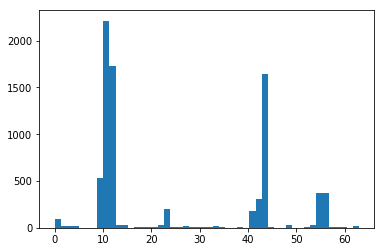

In [ ]:
x1 = x_val[1]
y1 = y_val[1]
ts_og = ts1[1]

#((x_val >= (x1-1)).all() and ((x_val <= (x1+1))).all()

indices = np.array(np.where((x_val >= (x1-1)) & (x_val <= (x1+1)) & (y_val >= (y1-1)) & (y_val <= (y1+1)) & (ts1 >= (ts_og-3)) & (ts1 <= (ts_og+3))))
print(arr)
arr = arr[arr != 1]
print(arr)


In [ ]:
x = 0
y = 0
ts = 0
x_cluster = []
y_cluster = []
ts_cluster = []
ind = []
ind_new = []
cluster_no = 0

for i in range(10):
    
    x = x_val[i]
    y = y_val[i]
    ts = ts1[i]
    
    print("Looking for hits similar to (%d, %d) at %d." %(x, y, ts))
    
    ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
    ind_new = ind_new[ind_new != i]
    
    double_count =  any(elem in ind_new for elem in ind)
 
    if double_count:

        print("Whoops, double counting !!")
        
    else:
            
        if len(ind_new)>0:
        
            print("Iterating again...")
            spread = [1]
        
            for j in range(len(ind_new)):
                x = x_val[int(ind_new[j])]
                y = y_val[int(ind_new[j])]
                ts = ts1[int(ind_new[j])]
                
                spread = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
                spread = spread[spread != int(ind_new[j])]
                spread = spread[spread != i]
                spread = list(spread)
                copies = []
            
                for k in range(len(spread)):
                
                    if spread[k] in ind_new:
                        copies = np.append(copies, spread[k])
            
                for l in range(len(copies)):
                    spread.remove(copies[l])
                
                counter = 0
                
                if len(spread) > 0:
                    
                    ind_new = np.append(ind_new, spread)
                    print("Added some spread to the initial hit.")
            
            ind = np.append(ind, ind_new)
 
            #cluster_no = cluster_no + 1
            #print("Potential matches:")
            #print(" Pixel:     Timestamp:")
    
            #for p in range(len(indices_new)):
                #print(" (%d, %d)      %d    " %(x_val[int(ind_new[p])], y_val[int(ind_new[p])], ts1[int(ind_new[p])]))
                #x_cluster = np.append(x_cluster, x_val[int(ind_new[p])])
                #y_cluster = np.append(y_cluster, y_val[int(ind_new[p])])
                #ts_cluster = np.append(ts_cluster, ts1[int(ind_new[p])])
        
            #print("Another cluster, %d total." %cluster_no)

In [ ]:
x = 0
y = 0
ts = 0
x_cluster = []
y_cluster = []
ts_cluster = []
ind = []
ind_new = []
cluster_no = 0

for i in range(10):
    
    x = x_val[i]
    y = y_val[i]
    ts = ts1[i]
    
    print("Looking for hits similar to (%d, %d) at %d." %(x, y, ts))
    
    ind_new = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
    ind_new = ind_new[ind_new != i]
    
    double_count =  any(elem in ind_new for elem in ind)
 
    if double_count:
        print("Whoops, double counting !!")
        
    else: 
        if len(ind_new)>0:
            print("Iterating again...")
            spread = []
            hit == True
        
            for j in range(len(ind_new)):
                counter = 0
                
                if len(spread) == 0:
                    x = x_val[int(ind_new[j])]
                    y = y_val[int(ind_new[j])]
                    ts = ts1[int(ind_new[j])]
                    
                else:
                    while counter < len(spread):
                        x = x_val[int(spread[counter])]
                        y = y_val[int(spread[counter])]
                        ts = ts1[int(spread[counter])]
                        
                        spread = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
                        spread = list(spread[spread != int(ind_new[j]) & i])
                        k = 0
            
                        while k < len(spread):
                            if spread[k] in ind_new:
                                spread.remove(spread[k])
                                k -= 1  
                            k += 1
                        
                        ind_new = np.append(ind_new, spread)
                        counter += 1
                
                spread = np.array(np.where((x_val >= (x-1)) & (x_val <= (x+1)) & (y_val >= (y-1)) & (y_val <= (y+1)) & (ts1 >= (ts-3)) & (ts1 <= (ts+3))))
                spread = list(spread[spread != int(ind_new[j]) & i])
                k = 0
            
                while k < len(spread):
                    if spread[k] in ind_new:
                        spread.remove(spread[k])
                        k -= 1  
                    k += 1
                    
                ind_new = np.append(ind_new, spread)
                    
            ind = np.append(ind, ind_new)
 
            #cluster_no = cluster_no + 1
            #print("Potential matches:")
            #print(" Pixel:     Timestamp:")
    
            #for p in range(len(indices_new)):
                #print(" (%d, %d)      %d    " %(x_val[int(ind_new[p])], y_val[int(ind_new[p])], ts1[int(ind_new[p])]))
                #x_cluster = np.append(x_cluster, x_val[int(ind_new[p])])
                #y_cluster = np.append(y_cluster, y_val[int(ind_new[p])])
                #ts_cluster = np.append(ts_cluster, ts1[int(ind_new[p])])
        
            #print("Another cluster, %d total." %cluster_no)